In [60]:
import cv2
import numpy as np
import imageio as iio
from scipy import ndimage
from matplotlib import pyplot as plt

In [61]:
orig = cv2.imread('city_orig.jpg',0)
noise = cv2.imread('city_noise.jpg',0)
(m,n) = orig.shape
origul = orig[0:int(m/2),0:int(n/2)]
origur = orig[0:int(m/2),int(n/2):n]
origdl = orig[int(m/2):m,0:int(n/2)]
origdr = orig[int(m/2):m,int(n/2):n]
#plt.imshow(noise,cmap='gray');

In [62]:
def SNR(x,y):
    x = x.astype(np.float64)
    y = y.astype(np.float64)
    a = np.sum(x**2)
    b = np.sum((x-y)**2)
    return 10*np.log10(a/b)

#x = np.ones(3)
#print(SNR(2*x,x))

### noise without filter

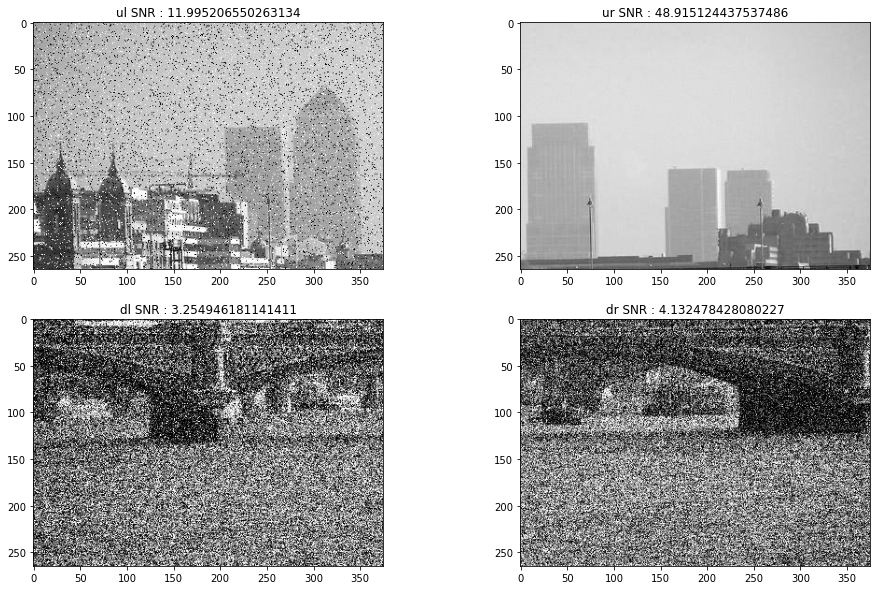

In [63]:
noiseul = noise[0:int(m/2),0:int(n/2)]
noiseur = noise[0:int(m/2),int(n/2):n]
noisedl = noise[int(m/2):m,0:int(n/2)]
noisedr = noise[int(m/2):m,int(n/2):n]

plt.figure(figsize = (16, 10))
plt.subplot(2,2,1)
plt.imshow(noiseul,cmap='gray');
plt.title('ul SNR : '+str(SNR(origul,noiseul)));

plt.subplot(2,2,2)
plt.imshow(noiseur,cmap='gray');
plt.title('ur SNR : '+str(SNR(origur,noiseur)));

plt.subplot(2,2,3)
plt.imshow(noisedl,cmap='gray');
plt.title('dl SNR : '+str(SNR(origdl,noisedl)));

plt.subplot(2,2,4)
plt.imshow(noisedr,cmap='gray');
plt.title('dr SNR : '+str(SNR(origdr,noisedr)));

### median

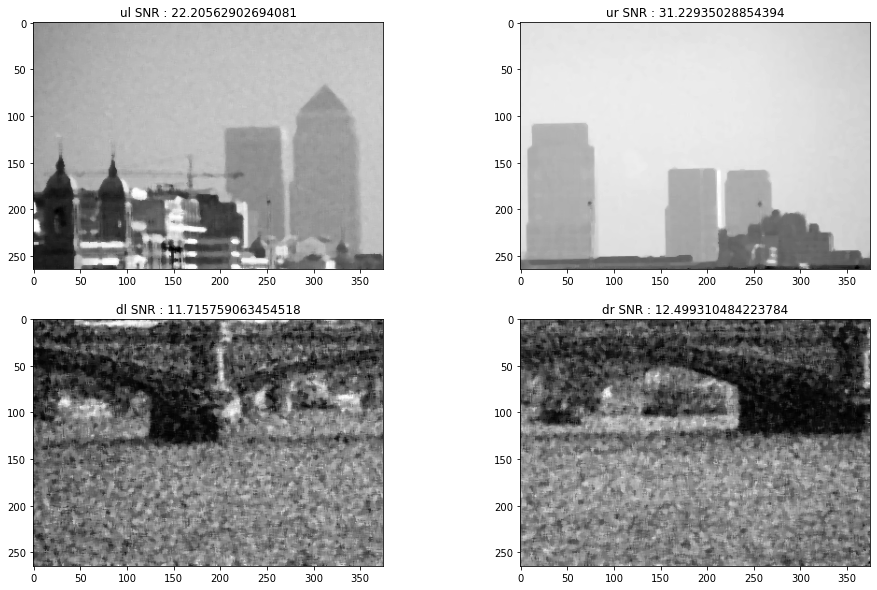

In [64]:
med = cv2.medianBlur(noise,5)
#plt.imshow(med,cmap='gray');
medul = med[0:int(m/2),0:int(n/2)]
medur = med[0:int(m/2),int(n/2):n]
meddl = med[int(m/2):m,0:int(n/2)]
meddr = med[int(m/2):m,int(n/2):n]

plt.figure(figsize = (16, 10))
plt.subplot(2,2,1)
plt.imshow(medul,cmap='gray');
plt.title('ul SNR : '+str(SNR(origul,medul)));

plt.subplot(2,2,2)
plt.imshow(medur,cmap='gray');
plt.title('ur SNR : '+str(SNR(origur,medur)));

plt.subplot(2,2,3)
plt.imshow(meddl,cmap='gray');
plt.title('dl SNR : '+str(SNR(origdl,meddl)));

plt.subplot(2,2,4)
plt.imshow(meddr,cmap='gray');
plt.title('dr SNR : '+str(SNR(origdr,meddr)));

### Gaussian 

181 13.253279031548658


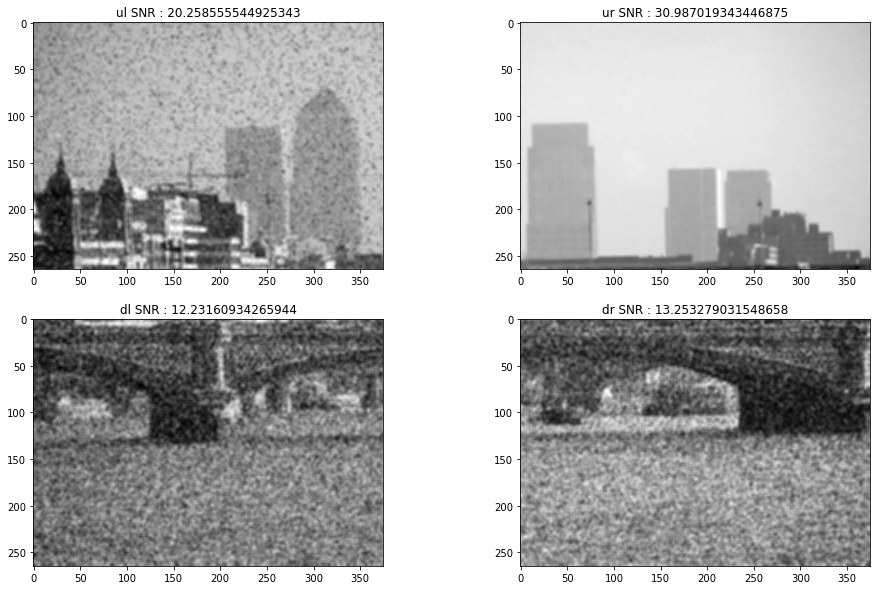

In [65]:
N = 5 #window size

snrs = np.zeros(1000)
for i in range(1000):
    sigma = i/100
    gaussian = cv2.GaussianBlur(noise,ksize=(N,N),sigmaX=sigma,sigmaY=sigma)
    snrs[i] = SNR(origdr,gaussian[int(m/2):m,int(n/2):n])
print(np.argmax(snrs),snrs[np.argmax(snrs)])

# -->>
sigma = 1.81
gaussian = cv2.GaussianBlur(noise,ksize=(N,N),sigmaX=sigma,sigmaY=sigma)
#plt.imshow(gaussian,cmap='gray');

gaussianul = gaussian[0:int(m/2),0:int(n/2)]
gaussianur = gaussian[0:int(m/2),int(n/2):n]
gaussiandl = gaussian[int(m/2):m,0:int(n/2)]
gaussiandr = gaussian[int(m/2):m,int(n/2):n]

plt.figure(figsize = (16, 10))
plt.subplot(2,2,1)
plt.imshow(gaussianul,cmap='gray');
plt.title('ul SNR : '+str(SNR(origul,gaussianul)));

plt.subplot(2,2,2)
plt.imshow(gaussianur,cmap='gray');
plt.title('ur SNR : '+str(SNR(origur,gaussianur)));

plt.subplot(2,2,3)
plt.imshow(gaussiandl,cmap='gray');
plt.title('dl SNR : '+str(SNR(origdl,gaussiandl)));

plt.subplot(2,2,4)
plt.imshow(gaussiandr,cmap='gray');
plt.title('dr SNR : '+str(SNR(origdr,gaussiandr)));

### Average

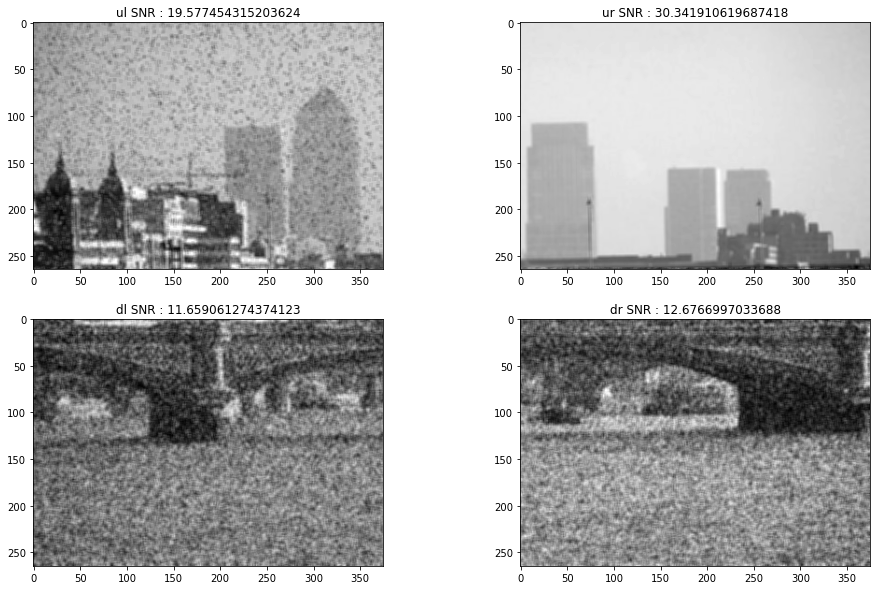

In [66]:
ker = np.ones((4,4))
ker = ker/np.sum(ker)
avg = ndimage.convolve(noise,ker)
#plt.imshow(avg,cmap='gray');

avgul = avg[0:int(m/2),0:int(n/2)]
avgur = avg[0:int(m/2),int(n/2):n]
avgdl = avg[int(m/2):m,0:int(n/2)]
avgdr = avg[int(m/2):m,int(n/2):n]

plt.figure(figsize = (16, 10))
plt.subplot(2,2,1)
plt.imshow(avgul,cmap='gray');
plt.title('ul SNR : '+str(SNR(origul,avgul)));

plt.subplot(2,2,2)
plt.imshow(avgur,cmap='gray');
plt.title('ur SNR : '+str(SNR(origur,avgur)));

plt.subplot(2,2,3)
plt.imshow(avgdl,cmap='gray');
plt.title('dl SNR : '+str(SNR(origdl,avgdl)));

plt.subplot(2,2,4)
plt.imshow(avgdr,cmap='gray');
plt.title('dr SNR : '+str(SNR(origdr,avgdr)));